<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/Part2-classN-deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')

In [2]:
#for setting up train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
y = red_wine['quality']
X = red_wine.drop(columns = 'quality')

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              12288     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [9]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [10]:
model.compile(
    optimizer='adam',
    loss='mse',
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              12288     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/1000
5/5 [==============================] - 5s 194ms/step - loss: 33.7845 - val_loss: 30.3827
Epoch 2/1000
5/5 [==============================] - 0s 40ms/step - loss: 31.7571 - val_loss: 28.6671
Epoch 3/1000
5/5 [==============================] - 0s 44ms/step - loss: 30.0354 - val_loss: 27.1856
Epoch 4/1000
5/5 [==============================] - 0s 42ms/step - loss: 28.6984 - val_loss: 25.7850
Epoch 5/1000
5/5 [==============================] - 0s 37ms/step - loss: 27.0081 - val_loss: 24.0297
Epoch 6/1000
5/5 [==============================] - 0s 38ms/step - loss: 25.4857 - val_loss: 22.0899
Epoch 7/1000
5/5 [==============================] - 0s 33ms/step - loss: 23.7778 - val_loss: 20.5590
Epoch 8/1000
5/5 [==============================] - 0s 45ms/step - loss: 22.0652 - val_loss: 18.4005
Epoch 9/1000
5/5 [==============================] - 0s 46ms/step - loss: 20.1077 - val_loss: 16.2471
Epoch 10/1000
5/5 [==============================] - 0s 51ms/step - loss: 18.3955 - val_lo

Minimum Validation Loss: 0.3944


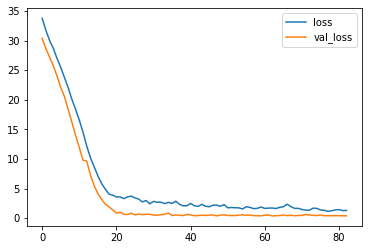

In [13]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Minimum Validation Loss: 0.4830
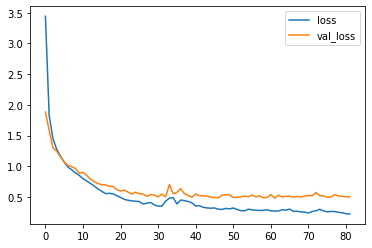

In [14]:
#making the predictions
dnn_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
#getting our results
dnn_mse = mean_squared_error(y_test,dnn_pred)

In [17]:
#printing rmse
print("MSE =",(round(dnn_mse,2)))

MSE = 0.39


In [18]:
#result table
from tabulate import tabulate

In [19]:
#gathering the results
result_table = [['Deep Learning', round(dnn_mse,2)]]

#defining header names
col_names = ["Model", "MSE"]

#creating a results table
print(tabulate(result_table, headers=col_names))

Model            MSE
-------------  -----
Deep Learning   0.39
